In [2]:
import numpy as np
import pandas as pd
from os import getcwd
from os.path import join, dirname
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [3]:
# checking correlation
def get_correlation_matrix(df):
    data = df.copy(deep = True)
    data.Weekday = pd.Categorical(data.Weekday)
    data.Customer_Type = pd.Categorical(data.Customer_Type)
    data['CusType_n'] = data['Customer_Type'].cat.codes
    data['Wday_n'] = data['Weekday'].cat.codes
    data.drop(['Customer_Type','Weekday'], axis=1, inplace = True)
    sns.heatmap(data.corr())

In [4]:
# Feature engineering
# Customer_data : One hot encoding
def one_hot_encoder(df,feature_list,keep_y=True):
    for f in feature_list:
        oh = OneHotEncoder()
        oh_df = pd.DataFrame(oh.fit_transform(df[[f]]).toarray())
        oh_df.columns = oh.get_feature_names_out()
    
        for col in oh_df.columns:
            oh_df.rename({col:f'{f}_'+col.split('_')[1]},axis=1,inplace=True)
    
        new_df = pd.concat([df,oh_df],axis=1)
        new_df.drop(f,axis=1,inplace=True)
        
    if keep_y== False:
        new_df=new_df.iloc[:,1:]
    
    return new_df


In [5]:
# Prepare data
data_folder_path = join(dirname(getcwd()), 'data')
data = pd.read_csv(join(data_folder_path, 'Newdata-2.csv'))

data.head()


,Transaction,Customer_Type,SystemF1,SystemF2,SystemF3,SystemF4,SystemF5,Account_Page,Account_Page_Time,Info_Page,...,ProductPage_Time,Month,Weekday,SpecificHoliday,GoogleAnalytics_BR,GoogleAnalytics_ER,GoogleAnalytics_PV,Ad_Campaign_1,Ad_Campaign2,Ad_Campaign3
0,0,Returning_Customer,1,2,7,10,2,0,0.000000,0,...,0.000000,11,True,0.0,0.200000,0.200000,0.0,0,0,0
1,0,Returning_Customer,2,2,3,2,3,10,147.458333,4,...,1587.765598,12,True,0.0,0.000000,0.010046,0.0,0,0,0
2,0,New_Customer,2,2,1,2,1,0,0.000000,0,...,183.500000,12,True,0.0,0.000000,0.033333,0.0,0,0,0
3,0,Returning_Customer,2,2,2,6,1,0,0.000000,0,...,295.000000,4,True,0.8,0.011765,0.052941,0.0,0,0,0
4,0,Returning_Customer,2,2,4,10,3,0,0.000000,2,...,624.000000,3,True,0.0,0.015385,0.046154,0.0,0,0,0


In [6]:
data.describe()

,Transaction,SystemF1,SystemF2,SystemF3,SystemF4,SystemF5,Account_Page,Account_Page_Time,Info_Page,Info_Page_Time,ProductPage,ProductPage_Time,Month,SpecificHoliday,GoogleAnalytics_BR,GoogleAnalytics_ER,GoogleAnalytics_PV,Ad_Campaign_1,Ad_Campaign2,Ad_Campaign3
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,0.156329,2.124211,2.357804,3.153298,4.073904,3.003687,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,7.394674,0.061942,0.020370,0.041466,5.949574,0.016796,0.016796,0.016796
std,0.363182,0.906823,1.710114,2.402340,4.016654,1.409130,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,3.622622,0.199666,0.045255,0.046163,18.653671,0.128513,0.128513,0.128513
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,4.000000,0.000000,0.000000,0.014231,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,8.000000,0.000000,0.002899,0.025000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,11.000000,0.000000,0.016667,0.048529,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.000000,13.000000,9.000000,20.000000,5.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,12.000000,1.000000,0.200000,0.200000,361.763742,1.000000,1.000000,1.000000


In [7]:
# summarizing data. checking missing values
data.info()

# check missing value
# percent_missing = data.isnull().sum() * 100 / len(data)
# missing_value_df = pd.DataFrame({'column_name': data.columns,
#                                 'percent_missing': percent_missing})
# missing_value_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction         12205 non-null  int64  
 1   Customer_Type       12205 non-null  object 
 2   SystemF1            12205 non-null  int64  
 3   SystemF2            12205 non-null  int64  
 4   SystemF3            12205 non-null  int64  
 5   SystemF4            12205 non-null  int64  
 6   SystemF5            12205 non-null  int64  
 7   Account_Page        12205 non-null  int64  
 8   Account_Page_Time   12205 non-null  float64
 9   Info_Page           12205 non-null  int64  
 10  Info_Page_Time      12205 non-null  float64
 11  ProductPage         12205 non-null  int64  
 12  ProductPage_Time    12205 non-null  float64
 13  Month               12205 non-null  int64  
 14  Weekday             12205 non-null  bool   
 15  SpecificHoliday     12205 non-null  float64
 16  Goog

In [8]:
nunique = [data[i].nunique() for i in data.columns ]
NUnique_value_df = pd.DataFrame({'column_name': data.columns,
                                'N_unique_values': nunique})
NUnique_value_df

,column_name,N_unique_values
0,Transaction,2
1,Customer_Type,3
2,SystemF1,8
3,SystemF2,13
4,SystemF3,9
5,SystemF4,20
6,SystemF5,5
7,Account_Page,27
8,Account_Page_Time,3335
9,Info_Page,17


In [9]:
data.Weekday = data.Weekday.astype('category')
data.Customer_Type = data.Customer_Type.astype('category')

print(data.Weekday.value_counts())
print()
print(data.Customer_Type.value_counts())

Weekday
True     9346
False    2859
Name: count, dtype: int64

Customer_Type
Returning_Customer    10431
New_Customer           1693
Other                    81
Name: count, dtype: int64


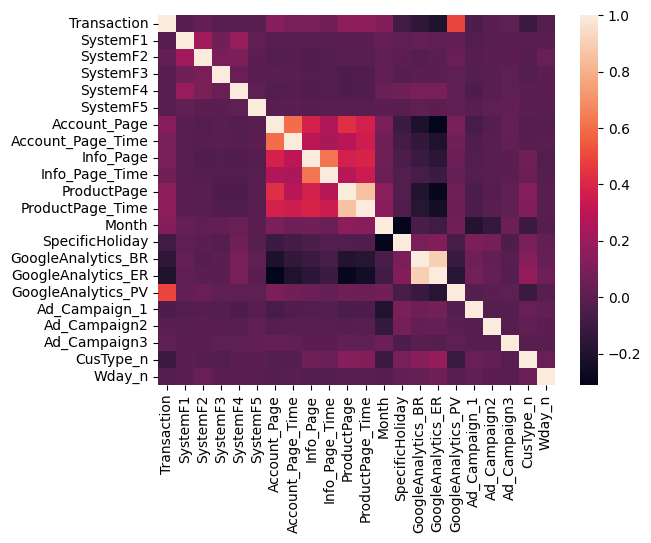

In [10]:
get_correlation_matrix(data)

In [11]:
# Encoding categorical features

data['Wday_n'] = data['Weekday'].cat.codes
data.drop('Weekday', axis=1, inplace = True)
data_n = data.rename(columns={"Customer_Type": "CusType"})

feature_list = ['CusType']
data_enc = one_hot_encoder(data_n,feature_list,keep_y=True)

In [12]:
#save_rawdata

data_enc.to_pickle(join(data_folder_path,"cleaned_df.pkl"))